##Taciana Alessandra Gomes Cruz

*Patient A



In [4]:
#Upload the sample_data from una_health_data_challenge

!mkdir -p sample_data/una_health_data_challenge/
!wget https://s3-de-central.profitbricks.com/una-health-data-challenge/una-health-data-challenge.zip -P sample_data/una_health_data_challenge/
!unzip /content/sample_data/una_health_data_challenge/una-health-data-challenge.zip -d sample_data/una_health_data_challenge/

--2021-11-10 07:39:58--  https://s3-de-central.profitbricks.com/una-health-data-challenge/una-health-data-challenge.zip
Resolving s3-de-central.profitbricks.com (s3-de-central.profitbricks.com)... 81.173.115.248
Connecting to s3-de-central.profitbricks.com (s3-de-central.profitbricks.com)|81.173.115.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27737 (27K) [application/zip]
Saving to: ‘sample_data/una_health_data_challenge/una-health-data-challenge.zip.1’

una-health-data-cha 100%[===================>]  27.09K  --.-KB/s    in 0s      

2021-11-10 07:40:02 (168 MB/s) - ‘sample_data/una_health_data_challenge/una-health-data-challenge.zip.1’ saved [27737/27737]

Archive:  /content/sample_data/una_health_data_challenge/una-health-data-challenge.zip
replace sample_data/una_health_data_challenge/aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa/activities_all.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_data/una_health_data_challenge/aaaaaaaa-aaaa-aaaa-

In [5]:
# Patient A
# df_p_a_meals :
# df_p_a_blood_glucose : 

import pandas as pd
df_p_a_meals = pd.read_csv('/content/sample_data/una_health_data_challenge/aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa/activities_all.csv')
df_p_b_meals = pd.read_csv('/content/sample_data/una_health_data_challenge/bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb/activities_all.csv')
df_p_c_meals = pd.read_csv('/content/sample_data/una_health_data_challenge/cccccccc-cccc-cccc-cccc-cccccccccccc/activities_all.csv')

df_p_a_blood_glucose = pd.read_csv('/content/sample_data/una_health_data_challenge/aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa/levels_all.csv',skiprows=1)
df_p_b_blood_glucose = pd.read_csv('/content/sample_data/una_health_data_challenge/bbbbbbbb-bbbb-bbbb-bbbb-bbbbbbbbbbbb/levels_all.csv',skiprows=1)
df_p_c_blood_glucose = pd.read_csv('/content/sample_data/una_health_data_challenge/cccccccc-cccc-cccc-cccc-cccccccccccc/levels_all.csv',skiprows=1)

#df_p_a_meals = df_p_b_meals
#df_p_a_blood_glucose = df_p_b_blood_glucose

In [6]:
# making the datatimes from both dfs equals
import datetime as dt

df_p_a_meals["timestamp_start"] = pd.to_datetime(df_p_a_meals["timestamp_start"])
df_p_a_meals["timestamp_start"] = df_p_a_meals["timestamp_start"].dt.strftime('%d-%m-%Y %H:%M')
df_p_a_meals["timestamp_start"]

0     15-02-2021 08:30
1     15-02-2021 12:45
2     15-02-2021 16:15
3     15-02-2021 17:00
4     15-02-2021 19:30
5     17-02-2021 08:15
6     17-02-2021 08:30
7     17-02-2021 12:15
8     17-02-2021 16:00
9     17-02-2021 19:30
10    19-02-2021 08:30
11    19-02-2021 12:00
12    19-02-2021 15:45
13    19-02-2021 19:00
Name: timestamp_start, dtype: object

In [7]:
df_p_a_blood_glucose["Gerätezeitstempel"]

0       18-02-2021 10:57
1       18-02-2021 11:12
2       18-02-2021 11:27
3       18-02-2021 11:42
4       18-02-2021 11:57
              ...       
1194    18-02-2021 09:42
1195    18-02-2021 09:57
1196    18-02-2021 10:12
1197    18-02-2021 10:27
1198    18-02-2021 10:42
Name: Gerätezeitstempel, Length: 1199, dtype: object

In [8]:
# Count all Aufzeichnungstyp types
df_p_a_blood_glucose["Aufzeichnungstyp"].sort_index().value_counts().head()

0    1022
1     163
6      14
Name: Aufzeichnungstyp, dtype: int64

In [9]:
import numpy as np

# adding extra columns in df_p_a_meals to make the analysis easier

df_p_a_meals["datatime_before"] = np.nan
df_p_a_meals["datatime_after"] = np.nan
df_p_a_meals["Aufzeichnungstyp_before"] = np.nan
df_p_a_meals["Aufzeichnungstyp_after"] = np.nan
df_p_a_meals["Glukose_before"] = np.nan
df_p_a_meals["Glukose_after"] = np.nan

In [10]:
# removing columns in df_p_a_meals that we will not be using
df_p_a_meals.columns
df_p_a_meals = df_p_a_meals.drop(columns=['payload', 'created','last_modified','timestamp_end'])
df_p_a_meals.columns

Index(['id', 'user_id', 'record_type', 'description', 'timestamp_start',
       'datatime_before', 'datatime_after', 'Aufzeichnungstyp_before',
       'Aufzeichnungstyp_after', 'Glukose_before', 'Glukose_after'],
      dtype='object')

In [11]:
#functions

def filtered_data(filtered_dates, time_meal):
  filtered_data = filtered_dates["Gerätezeitstempel"] == time_meal
  return filtered_dates[filtered_data]

In [12]:
def insert_values(i, df_p_a_meals, filtered_patient_data):
  df_p_a_meals['datatime_after'][i] = np.sort(filtered_patient_data['Gerätezeitstempel'])[0]
  aufzeichnungstyp_value = (np.sort(filtered_patient_data['Aufzeichnungstyp'])[0])
  df_p_a_meals['Aufzeichnungstyp_after'][i] = aufzeichnungstyp_value

  if aufzeichnungstyp_value == 0:
    df_p_a_meals['Glukose_after'][i] = (np.sort(filtered_patient_data['Glukosewert-Verlauf mg/dL'])[0])

  if aufzeichnungstyp_value == 1:
    df_p_a_meals['Glukose_after'][i] = (np.sort(filtered_patient_data['Glukose-Scan mg/dL'])[0])


In [13]:
def filtered_by_dates(df_p_a_blood_glucose, start_date_min, start_date_max):  
  after_start_date = pd.to_datetime(df_p_a_blood_glucose["Gerätezeitstempel"])>= start_date_min
  before_end_date = pd.to_datetime(df_p_a_blood_glucose["Gerätezeitstempel"])<= start_date_max

  between_two_dates = after_start_date & before_end_date
  filtered_dates = df_p_a_blood_glucose.loc[between_two_dates]

  return filtered_dates

In [14]:
df_p_a_blood_glucose = df_p_a_blood_glucose[(df_p_a_blood_glucose.Aufzeichnungstyp <= 1)]
# Count all Aufzeichnungstyp types
df_p_a_blood_glucose["Aufzeichnungstyp"].sort_index().value_counts().head()

0    1022
1     163
Name: Aufzeichnungstyp, dtype: int64

In [15]:
import datetime as dt
import datetime
from datetime import datetime, timedelta

for i in range(0, len(df_p_a_meals)):

  # Measure Glicose before the meal, considering the closest measure

  # Initial time minus 15 minutes to search for the closest lunch measure
  start_date = pd.to_datetime(df_p_a_meals["timestamp_start"][i])
  final_date = pd.to_datetime(df_p_a_meals["timestamp_start"][i]) - timedelta(minutes=30)

  # List closest measures
  filtered_dates_before = filtered_by_dates(df_p_a_blood_glucose, final_date, start_date)  

  # Glicose measure after the meal
  # Initial time plus 3 hours 

  start_date = pd.to_datetime(df_p_a_meals["timestamp_start"][i]) + timedelta(hours = 3)
  end_date = pd.to_datetime(df_p_a_meals["timestamp_start"][i]) + timedelta(hours = 3, minutes = 30)

  # Take the close to the end measure of the meal considering 3 hours after the beginning of the meail until 30 minutes after
  filtered_dates_after = filtered_by_dates(df_p_a_blood_glucose, start_date, end_date) 

  if( not filtered_dates_after.empty and not filtered_dates_before.empty):

    # BEFORE....................................................................
    
    # Glicose measure nearest the beginning of the meal
    before_meal = max(filtered_dates_before["Gerätezeitstempel"])

    filtered_patient_data_before = filtered_data(filtered_dates_before, before_meal)

    # Adding values into the df_p_a_meals - BEFORE

    df_p_a_meals['datatime_before'][i] = np.sort(filtered_patient_data_before['Gerätezeitstempel'])[0]
    df_p_a_meals['Aufzeichnungstyp_before'][i] = filtered_patient_data_before['Aufzeichnungstyp']
    aufzeichnungstyp_value = (np.sort(filtered_patient_data_before['Aufzeichnungstyp'])[0])

    if aufzeichnungstyp_value == 0:
      df_p_a_meals['Glukose_before'][i] = filtered_patient_data_before['Glukosewert-Verlauf mg/dL']
    if aufzeichnungstyp_value == 1:
      df_p_a_meals['Glukose_before'][i] = filtered_patient_data_before['Glukose-Scan mg/dL']

    # AFTER....................................................................

    # Closest glicose measure after 3 hours of meal
    after_meal = min(filtered_dates_after["Gerätezeitstempel"])

    patient_filtered_data_after = filtered_data(filtered_dates_after, after_meal)

    # Adding values into the df_p_a_meals - AFTER
    insert_values(i, df_p_a_meals, patient_filtered_data_after)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41:

In [16]:
# dataframe with all values done
df_p_a_meals

,id,user_id,record_type,description,timestamp_start,datatime_before,datatime_after,Aufzeichnungstyp_before,Aufzeichnungstyp_after,Glukose_before,Glukose_after
0,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa00,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_BREAKFAST,"40 g Haferflocken, 230 g Joghurt 0,3 %, 90 g B...",15-02-2021 08:30,15-02-2021 08:25,15-02-2021 11:41,0.0,0.0,80.0,69.0
1,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa01,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_LUNCH,"98 g M�hren-Walnuss-VK-Brot, 87 g Gurke, 55 g ...",15-02-2021 12:45,15-02-2021 12:41,15-02-2021 15:57,0.0,0.0,83.0,70.0
2,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa02,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_SNACK,"Mandarine, Teel�ffel Erdnussmu�",15-02-2021 16:15,15-02-2021 16:12,15-02-2021 19:27,0.0,0.0,73.0,73.0
3,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa03,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,ACTVITY_EASY,spazieren,15-02-2021 17:00,15-02-2021 16:57,15-02-2021 20:00,0.0,1.0,102.0,93.0
4,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa04,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_DINNER,"50 g BasmatiVollkorn Reis, 20g Currypaste, 15 ...",15-02-2021 19:30,15-02-2021 19:27,15-02-2021 22:43,0.0,0.0,73.0,86.0
5,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa05,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_BREAKFAST,"230 g Joghurt, 40g Haferflocken, 65 g Apfel",17-02-2021 08:15,17-02-2021 08:09,17-02-2021 11:21,1.0,0.0,78.0,76.0
6,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa06,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,DRINK,Espresso & Haferdrink (75 ml),17-02-2021 08:30,17-02-2021 08:21,17-02-2021 11:36,0.0,0.0,84.0,76.0
7,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa07,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_LUNCH,"220 g Kohlrabi, 2 Scheiben M�hren-Walnussbrot,...",17-02-2021 12:15,17-02-2021 12:06,17-02-2021 15:23,0.0,0.0,83.0,90.0
8,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa08,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,ACTVITY_MODERATE,Ganzk�rper workout,17-02-2021 16:00,17-02-2021 15:53,17-02-2021 19:08,0.0,0.0,79.0,77.0
9,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa09,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_DINNER,"Vollkornwrap mit 75 g Halloumi, 40 g Gew�rzgur...",17-02-2021 19:30,17-02-2021 19:30,17-02-2021 22:47,1.0,1.0,82.0,81.0


In [17]:
df_p_a_meals =  df_p_a_meals.dropna()
df_p_a_meals

,id,user_id,record_type,description,timestamp_start,datatime_before,datatime_after,Aufzeichnungstyp_before,Aufzeichnungstyp_after,Glukose_before,Glukose_after
0,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa00,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_BREAKFAST,"40 g Haferflocken, 230 g Joghurt 0,3 %, 90 g B...",15-02-2021 08:30,15-02-2021 08:25,15-02-2021 11:41,0.0,0.0,80.0,69.0
1,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa01,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_LUNCH,"98 g M�hren-Walnuss-VK-Brot, 87 g Gurke, 55 g ...",15-02-2021 12:45,15-02-2021 12:41,15-02-2021 15:57,0.0,0.0,83.0,70.0
2,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa02,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_SNACK,"Mandarine, Teel�ffel Erdnussmu�",15-02-2021 16:15,15-02-2021 16:12,15-02-2021 19:27,0.0,0.0,73.0,73.0
3,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa03,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,ACTVITY_EASY,spazieren,15-02-2021 17:00,15-02-2021 16:57,15-02-2021 20:00,0.0,1.0,102.0,93.0
4,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa04,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_DINNER,"50 g BasmatiVollkorn Reis, 20g Currypaste, 15 ...",15-02-2021 19:30,15-02-2021 19:27,15-02-2021 22:43,0.0,0.0,73.0,86.0
5,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa05,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_BREAKFAST,"230 g Joghurt, 40g Haferflocken, 65 g Apfel",17-02-2021 08:15,17-02-2021 08:09,17-02-2021 11:21,1.0,0.0,78.0,76.0
6,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa06,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,DRINK,Espresso & Haferdrink (75 ml),17-02-2021 08:30,17-02-2021 08:21,17-02-2021 11:36,0.0,0.0,84.0,76.0
7,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa07,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_LUNCH,"220 g Kohlrabi, 2 Scheiben M�hren-Walnussbrot,...",17-02-2021 12:15,17-02-2021 12:06,17-02-2021 15:23,0.0,0.0,83.0,90.0
8,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa08,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,ACTVITY_MODERATE,Ganzk�rper workout,17-02-2021 16:00,17-02-2021 15:53,17-02-2021 19:08,0.0,0.0,79.0,77.0
9,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaa09,aaaaaaaa-aaaa-aaaa-aaaa-aaaaaaaaaaaa,MEAL_DINNER,"Vollkornwrap mit 75 g Halloumi, 40 g Gew�rzgur...",17-02-2021 19:30,17-02-2021 19:30,17-02-2021 22:47,1.0,1.0,82.0,81.0


#Analisys of the dataset patient A

---

First of all, I would like to express that due to lack of data, I could not go deeper into the analyses. But I decided to work mainly with the means in each type of a meal and the correlation between glucose before and after.

Probably to observe a correlational behavior between features of this nature, we would need more data. However, with those presented for Patient A, it was not possible to observe any correlation between them, because the correlation index is equal to 0.04.

Through a simple and brief analysis of means and difference between means by meal category. We can observe that:
0. An important characteristic about the glucose levels of Patient A, is that taking into account that the normal levels are glucose 70 and 100mg/dL, we can verify that with the presented data the Patient A does not have diabetes.

1. Activities like ACTVITY_EASY. It had the greatest impact on lowering glucose at 8 points. But it should be noted that there is only one record of this activity in the dataset. This could also be an outlier, as shown in the scatter plot, due to the large difference between the data considered normal for this patient. Or point that leads to doubt is that ACTVITY_MODERATE had a smaller decrease in the difference between the glucose averages than ACTVITY_EASY.

2. Considering ACTIVITY_EASY as an outlier, we can understand that for this patient, DRINK was the routine activity that most contributed to a decrease in glucose. Getting to decrease 8 points on average. Followed by MEAL_BREAKFAST with a 6 point decrease from the mean.

3. MEAL_DINNER showed the worst performance among the difference of means, showing an increase in average glucose of 7.33.




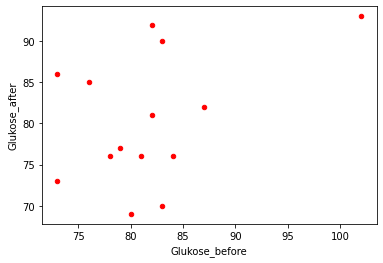

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing 
df_p_a_meals.plot(kind='scatter',x='Glukose_before',y='Glukose_after',color='red')
plt.show()

In [19]:
meals_type = (df_p_a_meals["record_type"].unique())
meals_type

array(['MEAL_BREAKFAST', 'MEAL_LUNCH', 'MEAL_SNACK', 'ACTVITY_EASY',
       'MEAL_DINNER', 'DRINK', 'ACTVITY_MODERATE'], dtype=object)

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

print("Glicose mean of the patient A according with meal category")

for i in range(0, len(meals_type)):
  print("\n")
  print("Mean of ",meals_type[i])

  mean_before = sum(df_p_a_meals[df_p_a_meals.record_type == meals_type[i]].Glukose_before)/len(df_p_a_meals[df_p_a_meals.record_type == meals_type[i]].Glukose_before)
  mean_after = sum(df_p_a_meals[df_p_a_meals.record_type == meals_type[i]].Glukose_after)/len(df_p_a_meals[df_p_a_meals.record_type == meals_type[i]].Glukose_after)
  
  print("Before :", mean_before)
  print("After: ", mean_after)
  print("Difference: ", mean_before - mean_after)



Glicose mean of the patient A according with meal category


Mean of  MEAL_BREAKFAST
Before : 79.66666666666667
After:  73.66666666666667
Difference:  6.0


Mean of  MEAL_LUNCH
Before : 80.66666666666667
After:  81.66666666666667
Difference:  -1.0


Mean of  MEAL_SNACK
Before : 80.0
After:  77.5
Difference:  2.5


Mean of  ACTVITY_EASY
Before : 102.0
After:  93.0
Difference:  9.0


Mean of  MEAL_DINNER
Before : 79.0
After:  86.33333333333333
Difference:  -7.333333333333329


Mean of  DRINK
Before : 84.0
After:  76.0
Difference:  8.0


Mean of  ACTVITY_MODERATE
Before : 79.0
After:  77.0
Difference:  2.0


In [21]:
# Correlation with all data
df_p_a_meals['Glukose_before'].corr(df_p_a_meals['Glukose_after'])

0.4047913030383765

In [22]:
# Correlation with all data except activities

onlyMeals = df_p_a_meals[(df_p_a_meals.record_type != "ACTVITY_EASY") & (df_p_a_meals.record_type != "ACTVITY_MODERATE")]
onlyMeals['Glukose_before'].corr(onlyMeals['Glukose_after'])

0.0432208805452103